In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataFrame = pd.read_csv(r"C:\Users\G3mini\Downloads\Internship\Titanic-Dataset.csv")
dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Checking null values
dataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Removing missing/null values
dataFrame = dataFrame.drop(columns="Cabin",axis=1)

In [6]:
# Replacing missing values with mean values
dataFrame["Age"].fillna(dataFrame["Age"].mean(),inplace=True)

In [7]:
# Fixing embarked
dataFrame["Embarked"].mode()[0]

'S'

In [8]:
dataFrame["Embarked"].fillna(dataFrame["Embarked"].mode()[0],inplace=True)

In [9]:
dataFrame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
Survived = dataFrame['Survived'].value_counts().reset_index()
Survived

,index,Survived
0,0,549
1,1,342


In [11]:
counts = dataFrame.groupby(['Survived', 'Sex']).size()
counts

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

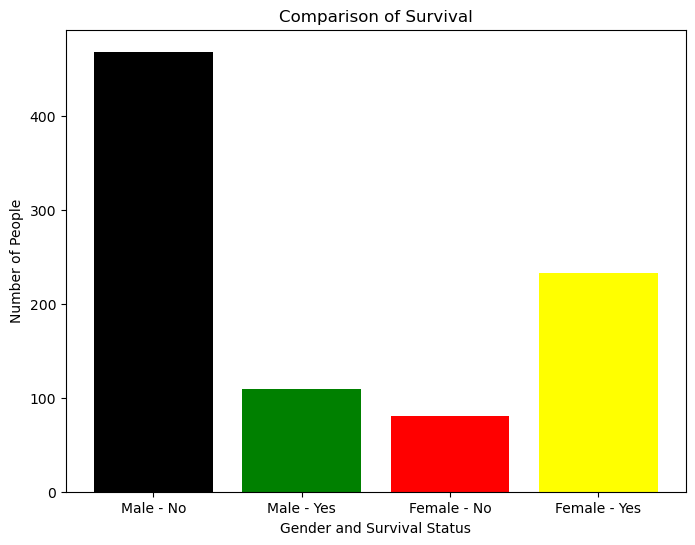

In [12]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [counts[0]["male"], counts[1]["male"], counts[0]["female"], counts[1]["female"]]}
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["black","green","red","yellow"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [13]:
dataFrame.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis='columns',inplace=True)
dataFrame.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [14]:
data = dataFrame.drop('Survived',axis='columns')
survive_data = dataFrame['Survived']
survive_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
sex=pd.get_dummies(data.Sex)
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
data=pd.concat([data,sex],axis="columns")
data.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [17]:
data.drop(["Sex"],axis="columns",inplace=True)

In [18]:
data.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [19]:
data.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

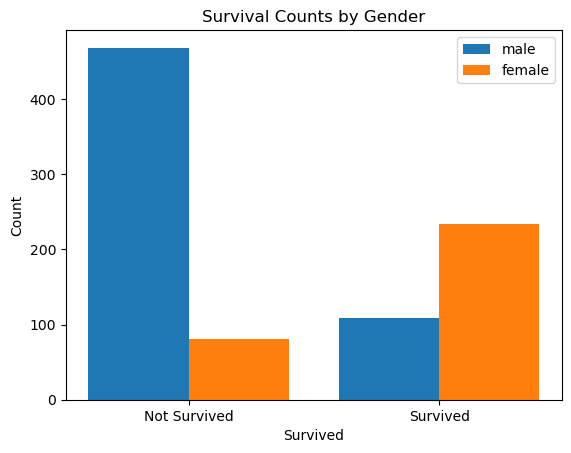

In [20]:
counts = dataFrame.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

bar_width = 0.40
index = counts.index

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')

ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

plt.show()

In [21]:
# Splitting the dataset into training and testing parts

X_train, X_test, y_train, y_test=train_test_split(data,survive_data,test_size=0.2)

In [22]:
X_train

,Pclass,Age,Fare,female,male
861,2,21.000000,11.5000,0,1
70,2,32.000000,10.5000,0,1
730,1,29.000000,211.3375,1,0
828,3,29.699118,7.7500,0,1
169,3,28.000000,56.4958,0,1
...,...,...,...,...,...
299,1,50.000000,247.5208,1,0
4,3,35.000000,8.0500,0,1
649,3,23.000000,7.5500,1,0
438,1,64.000000,263.0000,0,1


In [23]:
X_test

,Pclass,Age,Fare,female,male
114,3,17.000000,14.4583,1,0
45,3,29.699118,8.0500,0,1
464,3,29.699118,8.0500,0,1
509,3,26.000000,56.4958,0,1
14,3,14.000000,7.8542,1,0
...,...,...,...,...,...
666,2,25.000000,13.0000,0,1
308,2,30.000000,24.0000,0,1
603,3,44.000000,8.0500,0,1
457,1,29.699118,51.8625,1,0


In [24]:
y_train

861    0
70     0
730    1
828    1
169    0
      ..
299    1
4      0
649    1
438    0
670    1
Name: Survived, Length: 712, dtype: int64

In [25]:
y_test

114    0
45     0
464    0
509    1
14     0
      ..
666    0
308    0
603    0
457    1
95     0
Name: Survived, Length: 179, dtype: int64

In [26]:
data.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

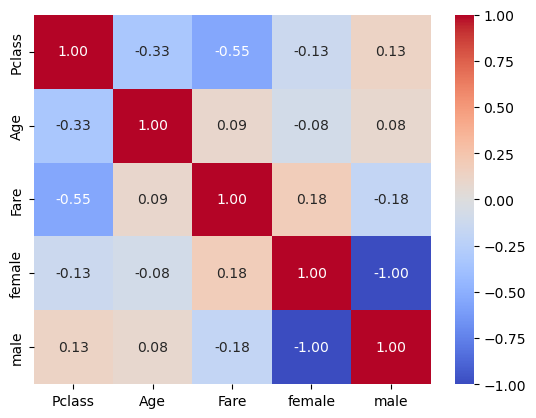

In [27]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [28]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Evaluating the performance of trained algorithm

model.score(X_test,y_test)

0.7988826815642458

In [30]:
predict=model.predict(X_test)
matrices=r2_score(predict,y_test)
matrices

0.13596138374899447